<a href="https://colab.research.google.com/github/Ruhit43/Deep-Learning--Image/blob/main/DL_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMAGE DETECTION USING CNN (VGG & RASNET)

In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

zip_path = '/content/Grapevine_Leaves_Image_Dataset.zip'
extract_path = '/content/extracted_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip file extracted successfully.")

Saving Grapevine_Leaves_Image_Dataset.zip to Grapevine_Leaves_Image_Dataset (1).zip
Zip file extracted successfully.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/extracted_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/extracted_data/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (89).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (30).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (52).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (70).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (82).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (14).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (80).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (91).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (50).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (62).png
/content/extracted_data/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (36).png
/content/extr

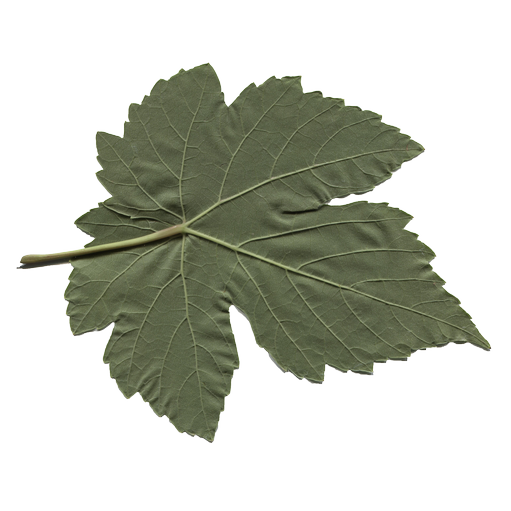

In [ ]:
from PIL import Image

image_path = '/content/extracted_data/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (29).png'

image1 = Image.open(image_path)
image1  # Display the image

In [ ]:
image1.size

(511, 511)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

base_dir = '/content/extracted_data/Grapevine_Leaves_Image_Dataset'

trainData = data.flow_from_directory(
    directory=base_dir,
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset="training"
)

testData = data.flow_from_directory(
    directory=base_dir,
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset="validation"
)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(256,256,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(5, activation ="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_95 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 5, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/5
13/13 [==============================] - 127s 10s/step - loss: 1.6848 - accuracy: 0.1850 - val_loss: 1.6101 - val_accuracy: 0.2000
Epoch 2/5
13/13 [==============================] - 124s 10s/step - loss: 1.6131 - accuracy: 0.1925 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 3/5
13/13 [==============================] - 122s 9s/step - loss: 1.6100 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.1900
Epoch 4/5
13/13 [==============================] - 123s 9s/step - loss: 1.6094 - accuracy: 0.2275 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 5/5
13/13 [==============================] - 120s 9s/step - loss: 1.6089 - accuracy: 0.2550 - val_loss: 1.6087 - val_accuracy: 0.2800


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, layers

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False,  input_shape=(256, 256, 3))

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-1]:
    layer.trainable = False

x = InceptionV3_model.output
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)

output  = layers.Dense(units=5, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_98[0][0]']              
 ormalization)                  )                                                           

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 5, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/5
13/13 [==============================] - 89s 7s/step - loss: 4.9314 - accuracy: 0.3400 - val_loss: 4.1514 - val_accuracy: 0.4100
Epoch 2/5
13/13 [==============================] - 83s 7s/step - loss: 1.5468 - accuracy: 0.6375 - val_loss: 1.4226 - val_accuracy: 0.6600
Epoch 3/5
13/13 [==============================] - 84s 7s/step - loss: 0.5457 - accuracy: 0.8350 - val_loss: 1.3987 - val_accuracy: 0.6300
Epoch 4/5
13/13 [==============================] - 82s 6s/step - loss: 0.4182 - accuracy: 0.8725 - val_loss: 1.2614 - val_accuracy: 0.6600
Epoch 5/5
13/13 [==============================] - 84s 7s/step - loss: 0.2394 - accuracy: 0.9225 - val_loss: 1.1966 - val_accuracy: 0.6800


In [ ]:
# VGG16
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg_model.layers:
  layer.trainable = False

x = vgg_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(5, activation='softmax')(x)

vgg_model = Model(vgg_model.input, output)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg_history = vgg_model.fit( trainData, steps_per_epoch=len(trainData), epochs=5, verbose=1, validation_data=testData, validation_steps=len(testData))

Epoch 1/5
13/13 [==============================] - 390s 30s/step - loss: 7.9949 - accuracy: 0.2625 - val_loss: 1.7567 - val_accuracy: 0.5300
Epoch 2/5
13/13 [==============================] - 381s 30s/step - loss: 1.4122 - accuracy: 0.6225 - val_loss: 1.3637 - val_accuracy: 0.5400
Epoch 3/5
13/13 [==============================] - 384s 30s/step - loss: 0.5126 - accuracy: 0.8200 - val_loss: 0.9311 - val_accuracy: 0.6500
Epoch 4/5
13/13 [==============================] - 373s 29s/step - loss: 0.3469 - accuracy: 0.8825 - val_loss: 0.7947 - val_accuracy: 0.7500
Epoch 5/5
13/13 [==============================] - 380s 31s/step - loss: 0.1996 - accuracy: 0.9275 - val_loss: 0.7147 - val_accuracy: 0.7400


In [ ]:
# ResNet50
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet_model.layers:
  layer.trainable = False

x = resnet_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(5, activation='softmax')(x)

resnet_model = Model(resnet_model.input, output)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
resnet_history = resnet_model.fit(trainData, steps_per_epoch=len(trainData), epochs=5, verbose=1, validation_data=testData, validation_steps=len(testData))

Epoch 1/5
13/13 [==============================] - 181s 14s/step - loss: 71.1429 - accuracy: 0.2400 - val_loss: 36.9536 - val_accuracy: 0.2000
Epoch 2/5
13/13 [==============================] - 165s 13s/step - loss: 16.9199 - accuracy: 0.3200 - val_loss: 6.9931 - val_accuracy: 0.3800
Epoch 3/5
13/13 [==============================] - 166s 13s/step - loss: 6.5817 - accuracy: 0.3600 - val_loss: 3.5337 - val_accuracy: 0.4500
Epoch 4/5
13/13 [==============================] - 173s 14s/step - loss: 3.5904 - accuracy: 0.3900 - val_loss: 2.2965 - val_accuracy: 0.2900
Epoch 5/5
13/13 [==============================] - 163s 13s/step - loss: 1.5736 - accuracy: 0.4600 - val_loss: 1.6576 - val_accuracy: 0.4300
